# Section1

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [19]:
df=pd.read_csv('T1.csv')
df.head()
#df.shape
#df.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [20]:
# omit negative values
df= df[df['LV ActivePower (kW)']>0]

# omit missing values
df=df.dropna()

df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [21]:
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()

data_process=df[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
data_process=scaler.fit_transform(data_process)
print(type(data_process))

data_process[:5]

<class 'numpy.ndarray'>


array([[-0.91649717,  1.67442896, -1.08191076],
       [-0.82087605,  1.77464493, -1.00261772],
       [-0.94175173,  1.82012324, -1.10137558],
       [-0.82418663,  1.8049776 , -1.00551878],
       [-0.84584616,  1.74025721, -1.02421485]])

# section2

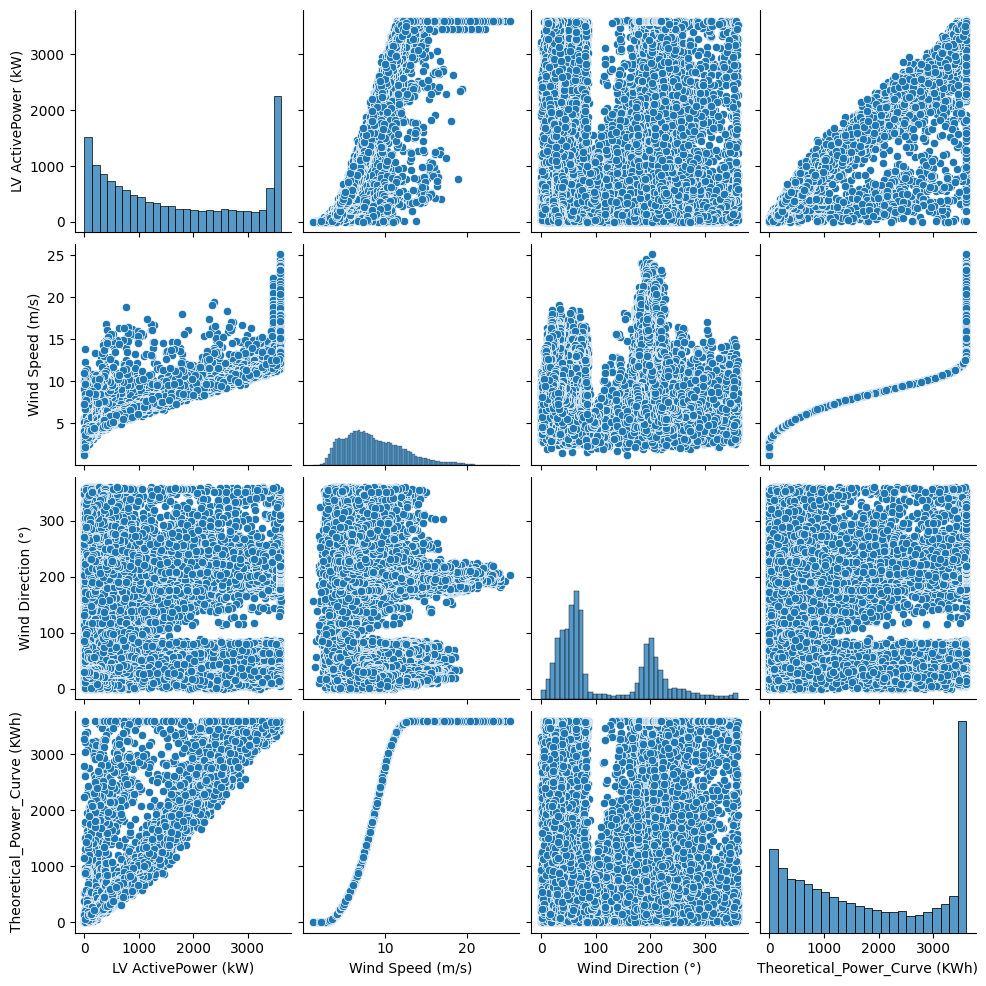

In [22]:
sns_plot= sns.pairplot(data=df, vars=['LV ActivePower (kW)','Wind Speed (m/s)','Wind Direction (°)','Theoretical_Power_Curve (KWh)'])
sns_plot.figure.savefig("output.png")
plt.show()


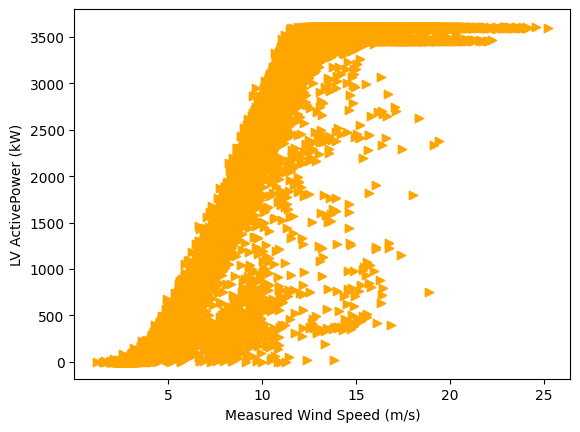

In [23]:
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'], color='orange', marker='>')
plt.xlabel('Measured Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.savefig('scatterplt_1.png')
plt.show()

# section3

In [24]:
from sklearn.model_selection import train_test_split

x=data_process
y=df['LV ActivePower (kW)']

xtrain, xtest, ytrain, ytest=train_test_split(x, y, train_size=0.8, random_state=1)
print('test properties: ', xtest.shape, ytest.shape)
print('train properties: ', xtrain.shape, ytrain.shape)



test properties:  (7939, 3) (7939,)
train properties:  (31753, 3) (31753,)


In [25]:
A=train_test_split(x, y, train_size=0.8, random_state=1)

for arrays in A:
    print(arrays.shape)

(31753, 3)
(7939, 3)
(31753,)
(7939,)


In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('formula:= Predicted Active Power', model.coef_[0],'*WS + ', model.coef_[1], '*WD + ', model.coef_[2], '*TPC + ', model.intercept_)

Coefficients: [ 193.61070291   25.95351594 1051.63934241]
Intercept: 1664.0420237244443
formula:= Predicted Active Power 193.6107029068053 *WS +  25.953515936153735 *WD +  1051.6393424095063 *TPC +  1664.0420237244443


In [27]:
from sklearn.linear_model import Ridge
model2=Ridge(alpha=1.0, solver='auto')
model2.fit(xtrain,ytrain)

Ridge()

# section4

In [28]:
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error

ypred=model.predict(xtest)

mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 71000.35211705232
Mean Absolute Error: 139.2950390837865
R-squared: 0.9552366150563694


In [29]:
sample={'Wind Speed (m/s)': [10.45, 8.55], 'Wind Direction (°)': [225.12, 185.45] ,'Theoretical_Power_Curve (KWh)': [3500, 2840]}
sdf=pd.DataFrame(sample)
y_sample = model.predict(sdf)
y_sample[0]

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


3690267.6278099194

Text(0.5, 1.0, 'Actual vs. Predicted Wind Turbine Power Output')

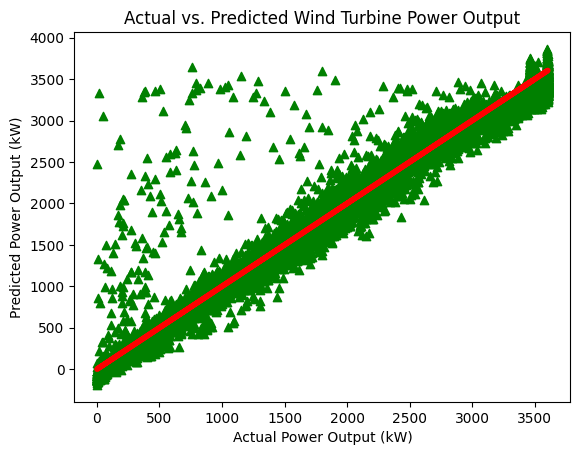

In [30]:
plt.scatter(ytest,ypred, color='Green', marker='^')
plt.plot(ytest, ytest, color='red',linewidth=4.0)

plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs. Predicted Wind Turbine Power Output")